# 지도학습(2) - 회귀분석
- `단순선형 회귀분석`으로 `농어의 길이`를 가지고 `무게를 예측`하는 모델 만들기

## 1. 작업 준비
### 패키지 및 데이터 가져오기 및 그래프 전역 설정

In [91]:
import sys
import numpy as np
import seaborn as sb                    # 데이터 시각화를 위한 모듈
from pandas import read_excel           # 엑셀 데이터 가져오기 위한 모듈
from matplotlib import pyplot as plt    # 그래프 그리기 위한 모듈

from sklearn.linear_model import LinearRegression       # 선형 회귀분석하기 위한 모듈
from sklearn.model_selection import train_test_split    # 훈련/검증 데이터 분리하기 위한 모듈

In [4]:
origin = read_excel('https://data.hossam.kr/F02/fish.xlsx')
origin = origin[['길이', '무게']]
origin.head()

,길이,무게
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0


In [92]:
plt.rcParams['font.family'] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.unicode_minus'] = False

## 1. 데이터 전처리
### 1) 훈련데이터와 검증데이터 분할 (보통 7:3으로 분할)
- train data / 훈련 데이터 (7): 모델을 생성하는데 사용되는 데이터 
- test data / 검증 데이터 (3): 모델이 얼마나 잘 만들어졌는지 확인하는 용도
- 상황/개인 편의에 따라 1-> 데이터프레임을 통째로 분할하거나 2-> 데이터프레임을 독립변수랑 종속변수로 분리하여 사용하는 경우가 있다
#### 1-> 데이터프레임을 통째로 넣는 경우
- 데이터프레임에 독립변수와 종속변수가 모두 포함되어 있는 형태
- 같은 유형으로 원본 데이터프레임이 7:3으로 분할된 두 개의 데이터프레임이 반환된다
- `train, test = train_test_split('원본데이터프레임', test_size = n, train_size = n, random_state = 777, 등)`
    - test_size와 train_size 둘 중 하나만 주면 나머지는 자동으로 계산돼서 적용됨
    - test_size = n 에서 n은 0~1 사이로 분리할 비율을 나타냄
        - test_size = 0.3 일 경우 test은 3의 비율로, train은 7의 비율로 분할됨
        - test_size = 0.3로 주면 train_size는 자동으로 0.7이 됨
        - 설정하지 않을 경우 자동으로 test_size는 0.25가 됨
    - random_state = 777 을 파라미터로 넣으면 777번째의 조합을 사용하겠다고 선언하는 것
        - random_state 파라미터를 안 넣으면 매번 랜덤으로 분할됨

In [93]:
# 속성 확인
?train_test_split

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [94]:
train, test = train_test_split(origin, test_size = 0.3, random_state = 777)

In [95]:
print(len(train))
train.head()

39


,길이,무게
8,19.6,85.0
0,8.4,5.9
15,22.0,120.0
26,24.6,188.0
51,42.0,1100.0


In [96]:
print(len(test))
test.head()

17


,길이,무게
16,22.0,130.0
12,21.0,125.0
21,22.7,145.0
33,27.5,250.0
36,30.0,320.0


#### 2-> 데이터프레임을 독립변수와 종속변수로 분리하여 사용하는 경우
- 독립변수를 7:3으로 분할한 형태와 종속변수를 7:3으로 분할한 형태가 반환된다
- -> 총 4개의 데이터프레임 생성

In [97]:
# 독립변수, 종속변수 분리
x_data = origin[['길이']]
y_data = origin[['무게']]

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x_data, # 독립변수
                                                    y_data, # 종속변수
                                                    test_size = 0.3,
                                                    random_state = 777)

In [99]:
print(len(x_train))
x_train.head()

39


,길이
8,19.6
0,8.4
15,22.0
26,24.6
51,42.0


In [100]:
print(len(x_test))
x_test.head()

17


,길이
16,22.0
12,21.0
21,22.7
33,27.5
36,30.0


In [101]:
print(len(y_train))
y_train.head()

39


,무게
8,85.0
0,5.9
15,120.0
26,188.0
51,1100.0


In [102]:
print(len(y_test))
y_test.head()

17


,무게
16,130.0
12,125.0
21,145.0
33,250.0
36,320.0


## 3. 데이터 분석
### 1) 선형 회귀분석 수행
- `my_model = LinearRegression()` --> 분석 알고리즘을 포함하고 있는 `객체 생성`
- `my_fit = 생성한객체.fit(독립변수, 종속변수)` --> 분석 모델을 학습시킴

In [103]:
my_model = LinearRegression()
my_fit = my_model.fit(x_train, y_train)

print('계수: ', my_fit.coef_)
print('절편: ', my_fit.intercept_)
print('훈련 데이터 설명력: ', my_fit.score(x_train, y_train))
print('검증 데이터 설명력: ', my_fit.score(x_test, y_test))

print('회귀식 추정:', 'y = {0:.2f} * x + {1:.2f}'.format(my_fit.coef_[0][0],
                                         my_fit.intercept_[0]))

계수:  [[37.01288998]]
절편:  [-636.25427098]
훈련 데이터 설명력:  0.9114180355953712
검증 데이터 설명력:  0.933893451951942
회귀식 추정: y = 37.01 * x + -636.25


설명력에 관하여:
- 훈련데이터와 검증데이터의 설명력을 봤을 때, 이론적으로는 훈련 데이터의 설명력이 검증 데이터보다 더 높아야 한다 (70% 비율의 데이터로 학습시킨 모델이기 때문에)
- 그러나 지금 같은 경우에는 검증 데이터의 설명력이 훈련 데이터의 설명력보다 더 우세하므로 `과적합인 경우`이다.
### 2) 분석 결과 시각화

[19.6  8.4 22.  24.6 42.  15.  18.7 17.4 37.  27.3 25.6 32.8 21.  28.
 39.  27.5 43.  40.  18.  22.5 37.  13.7 25.  27.5 22.  21.3 22.  40.
 24.  39.  24.  44.  26.5 19.  40.  23.5 34.5 40.  35. ]
[  89.1983727  -325.34599512  178.02930866  274.26282262  918.28710833
  -81.06092123   55.88677171    7.77001473  733.22265842  374.19762557
  311.2757126   577.76852048  141.01641868  400.10664856  807.24843838
  381.60020357  955.29999832  844.26132837   29.97774872  196.53575365
  733.22265842 -129.17767821  289.06797861  381.60020357  178.02930866
  152.12028567  178.02930866  844.26132837  252.05508863  807.24843838
  252.05508863  992.3128883   344.58731359   66.99063871  844.26132837
  233.54864364  640.69043346  844.26132837  659.19687845]


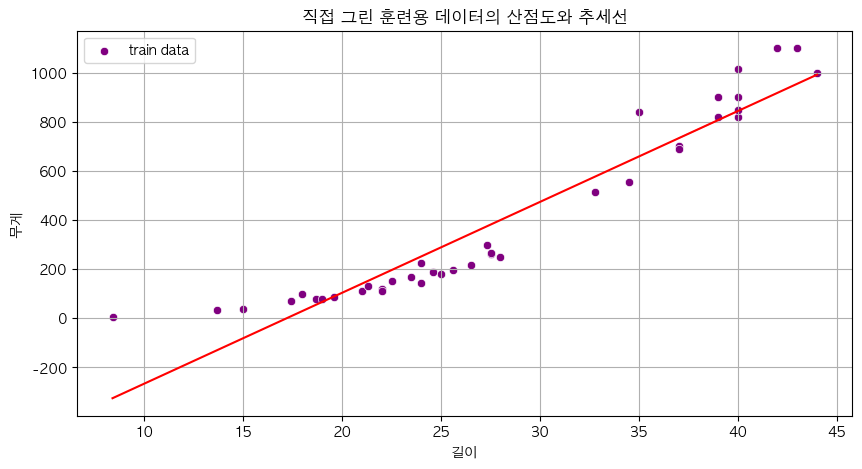

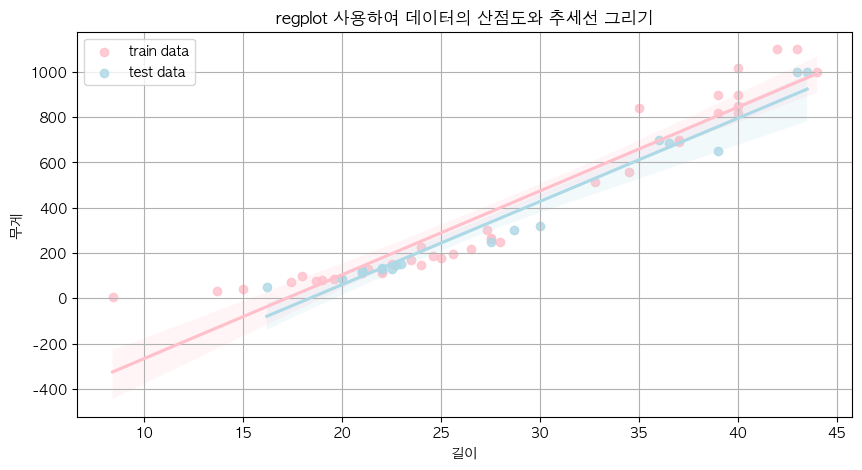

In [104]:
plt.figure(figsize=(10, 5))

# 원본 데이터 전체
# sb.regplot(data = origin, x='길이', y='무게', color = 'red')


# 학습에 사용된 데이터만으로 산점도 그래프 그리기
sb.scatterplot(x=x_train['길이'], 
          y=y_train['무게'], 
          label = 'train data',
          color = 'purple')
# 직접 도출한 회귀식에 의한 회귀선 그리기 (추세선)
    # y_train에 대한 추정치 구하기:
x = x_train['길이'].values
print(x)
y = my_fit.coef_[0][0] * x + my_fit.intercept_[0]
print(y)
sb.lineplot(x = x, 
            y = y,
            color = 'red')
plt.title('직접 그린 훈련용 데이터의 산점도와 추세선')
plt.legend()
plt.grid()
plt.show()
plt.close()

# 그래프상 x축, y축 범위 확인
# print(plt.xlim())
# print(plt.ylim())

# 학습에 사용된 데이터만으로 산점도 + 추세선 그래프 그리기
sb.regplot(x=x_train['길이'], 
          y=y_train['무게'], 
          label = 'train data',
          color = 'pink')

# 검정 데이터만으로 산점도 + 추세선 그래프 그리기
sb.regplot(x=x_test['길이'],
          y=y_test['무게'],
          label = 'test data',
          color = 'lightblue')
plt.title('regplot 사용하여 데이터의 산점도와 추세선 그리기')
plt.legend()
plt.grid()
plt.show()
plt.close()

> 91%라는 설명력에 비해 ('데이터들이 추세선에 91% 맞다'라는 설명력) 추세선으로부터 실제 데이터들이 너무 멀리 떨어져 있다 (= 잔차가 크다)
> 
> 검증 데이터의 추세선 또한 훈련 데이터의 추세선이랑 좀 떨어져 있다.
>
> 그러므로 `과적합(그 중에서도 과대적합)`의 냄새가 난다.

## 4. 과적합
### 1) 과소적합 (underfitting)
-  분석 모델이 너무 단순해서 데이터의 구조를 제대로 학습하지 못할 경우

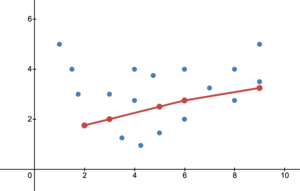

In [105]:
from IPython.display import display, Image
display(Image('image7.png'))

- 모델이 단순하다는 의미는 변수(피처feature)의 수가 (이 현상을 설명하기에) 부족함을 의미함
- 회귀식이 너무 단순하게 나와서 이 복잡한 데이터를 제대로 표현 못하는 것

#### 해결 방법
- 모델 파라미터가 더 많은 모델을 선택 (`단순선형회귀 -> 다항회귀`)
- 학습 알고리즘에 더 좋은 특성을 제공
> 결국은 변수를 늘리라는 뜻

### 2) 과대적합 (overfitting?)
- `훈련 데이터`에 있는 `잡음의 양`이 모델에 비해 너무 복잡한 경우
- `설명력에 비해 잔차가 큰 경우`라 할 수 있다

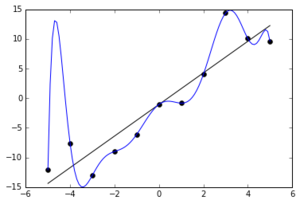

In [106]:
from IPython.display import display, Image
display(Image('image8.png'))

#### 해결 방법
- 파라미터 수가 적은 모델을 선택
- 훈련 데이터의 `특성 수를 줄임`
- 모델을 단순화 시킴
> -> 결국은 변수를 줄이라는 뜻
- 훈련 데이터의 잡음을 줄임
> -> 이상치 제거하라는 뜻

## 5. 다항회귀(단일피쳐 다항회귀, 곡선회귀)
- 데이터에 잘 맞는 일차 함수나 직선(단순성형회귀)을 구하는 게 아니라 `다항식`이나 `곡선`을 구해서 학습하는 방법
- 하나의 입력 변수에 대하여 `차수를 확장`하여 `다차원 회귀 모델을 도출`한다

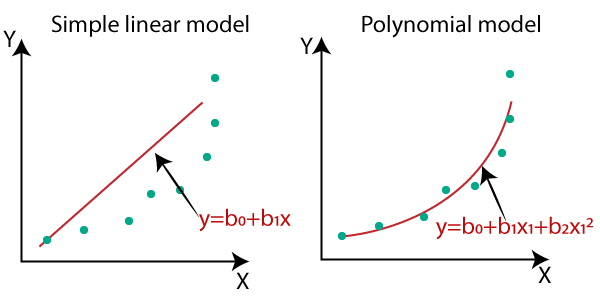

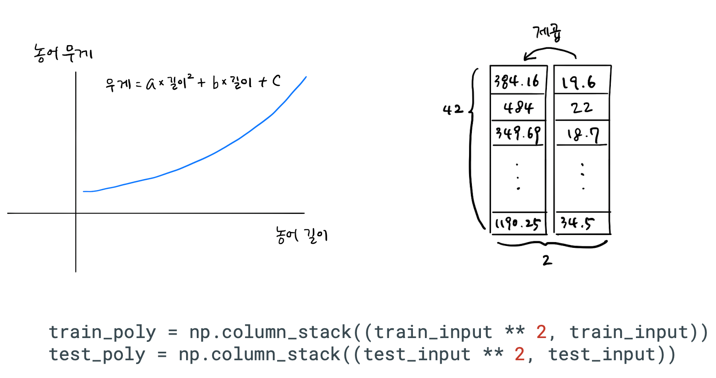

In [108]:
from IPython.display import display, Image
display(Image('image5.png'))
display(Image('image6.png'))

### 1) 데이터 전처리 (훈련 데이터와 검증 데이터 분할)
#### 훈련 데이터의 독립변수 추가 

In [119]:
x_train['길이^2'] = x_train['길이'] ** 2
x_train.head()

,길이,길이^2
8,19.6,384.16
0,8.4,70.56
15,22.0,484.00
26,24.6,605.16
51,42.0,1764.00


#### 검증 데이터의 독립변수 추가

In [110]:
x_test['길이^2'] = x_test['길이'] ** 2
x_test.head()

,길이,길이^2
16,22.0,484.00
12,21.0,441.00
21,22.7,515.29
33,27.5,756.25
36,30.0,900.00


### 2) 분석 (다항 회귀 분석)

In [112]:
my_model = LinearRegression()
my_fit = my_model.fit(x_train, y_train)

print('계수: ', my_fit.coef_)
print('절편: ', my_fit.intercept_)
print('훈련 데이터 설명력: ', my_fit.score(x_train, y_train))
print('검증 데이터 설명력: ', my_fit.score(x_test, y_test))

print('회귀식 추정:',
      'y = {0:.2f} * x^2 + {1:.2f} * x + {2:.2f}'.format(my_fit.coef_[0][1],
                                                         my_fit.coef_[0][0],
                                                         my_fit.intercept_[0]))

계수:  [[-23.92139238   1.06707967]]
절편:  [143.06821268]
훈련 데이터 설명력:  0.9741164053383603
검증 데이터 설명력:  0.9608757319315258
회귀식 추정: y = 1.07 * x^2 + -23.92 * x + 143.07


설명력에 관하여
- 훈련 데이터의 설명력이 단순회귀 했을 때보다 더 높아졌다 -> 다항 회귀 채택
- 위와 같이 검증 데이터의 설명력이 훈련 데이터의 설명력보다 더 낮은 것이 이상적이다.
> `제곱된 변수를 추가하여 다항회귀 분석을 수행하였고, 그 결과 설명력도 높아지고 잔차도 확연히 줄어든 것을 볼 수 있다.`

### 3) 분석 결과 시각화

7.0 46.0
[ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24.
 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42.
 43. 44. 45.]
[  27.90536988   19.99017256   14.20913459   10.56225596    9.04953667
    9.67097672   12.42657612   17.31633485   24.34025294   33.49833036
   44.79056712   58.21696323   73.77751868   91.47223347  111.30110761
  133.26414108  157.3613339   183.59268606  211.95819757  242.45786841
  275.0916986   309.85968813  346.76183701  385.79814522  426.96861278
  470.27323968  515.71202592  563.28497151  612.99207644  664.83334071
  718.80876432  774.91834727  833.16208957  893.53999121  956.05205219
 1020.69827252 1087.47865218 1156.39319119 1227.44188954]


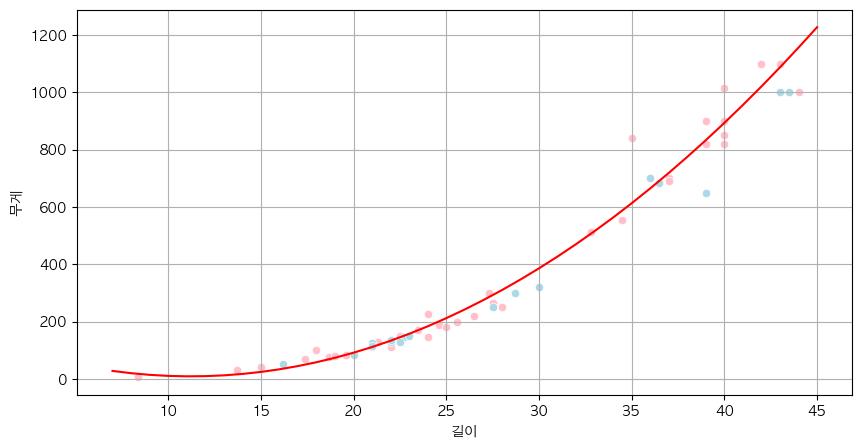

In [125]:
plt.figure(figsize = (10, 5))

# 훈련 데이터만으로 산점도 그래프 그리기
sb.scatterplot(x=x_train['길이'], y=y_train['무게'], color='pink')

# 검정 데이터만으로 산점도 그래프 그리기
sb.scatterplot(x=x_test['길이'], y=y_test['무게'], color='lightblue')

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표 생성
xmin, xmax = plt.xlim()
print(xmin.round(), xmax.round())
xrange = np.arange(xmin.round(), xmax.round(), 1)
print(xrange)

# y값에 대한 추정치를 계산
y_pred = xrange * my_fit.coef_[0][0] + xrange**2 * my_fit.coef_[0][1] + my_fit.intercept_[0]
print(y_pred)

# 추세선 그리기
sb.lineplot(x=xrange, y=y_pred, color='red')

plt.grid()
plt.show()
plt.close()